In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading Dataset
df = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


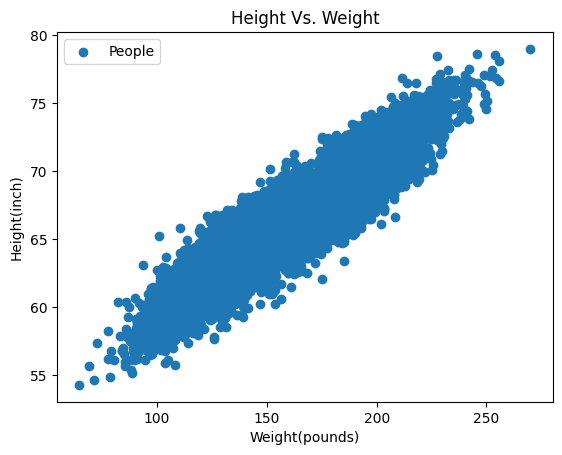

In [21]:
#Creating a Scatter Plot for visualization
plt.scatter(x=df['Weight'],y=df['Height'],label = 'People')
plt.xlabel('Weight(pounds)')
plt.ylabel('Height(inch)')
plt.title('Height Vs. Weight')
plt.legend()

In [5]:
#Finding Correlation between Weight and Height
df.corr(numeric_only=True)
# we have slected numeric_only = True so that our function will not give error 
# by finding correlation between gender which is string and other parameter
# as we can see that our pearson coiefficient is 0.924756 which means our height and weight are strongly positively correlated
# Now we can see that there is a strong linear relationship between our features so we have decided to use simple linear regression to train our model

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [6]:
#Creating our Independent and Dependent Features 
#We Should Always remember that our Independent feature should always be a dataframe or 2-dimensional array not a series or 1-D array because this will cause difficulty in training the data
#But Dependent Feature can be a Series because there will always be only one dependent feature but Independent Feature can be multiple 
X_Series = df['Height'] # Now if we use only one bracket [] it will create a Series and not a dataframe or 2-D array
X = df[['Height']] #This will create a dataframe or 2-D array
Y = df['Weight']
# X(Height)--Independent , Y(Weight)--Dependent 
X


,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [7]:
np.array(X_Series).shape
# As we can see it has only rows and no column so it is a 1-D array

(10000,)

In [8]:
#Test-Train-Split
#Now we will split our data set into training and testing data 
#Training Data will be used for training the model and testing data will be used for testing model accuracy after training the model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25) #test_size = 0.25 means it will randomly select 25% of data as testing data

In [9]:
X_train


,Height
4856,66.765467
6660,64.704359
7207,63.768212
5038,63.407290
2663,65.594302
...,...
7521,62.166412
9430,66.158054
3195,71.473571
5656,65.603168


In [10]:
#Standardization
#Now we will Standardize the independent feature because multiple features can have different units 
# so first we have to standardize the independent feature using Z-Score using SKlearn
#We do not have to standardize dependent feature because gradient descent only uses independent variable for optimization
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)#Here we are using transform intead of fit_transform because when we use just transform it will use 'Mean' and 'Standard deviation' of X_train to standardize X_test using Z-Score we are using 'mean' and 'std' of training data for standardizing test data instead of test data 'mean' and 'std' to avoid 'Data Leakage' which means model should not have any information about test data 


In [11]:
#Applying Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)#when n_jobs = -1 all the processors in the system are used fro training model
regression.fit(X_train,Y_train)


LinearRegression(n_jobs=-1)

In [12]:
regression.coef_ # Gives the coefficient or slope of the line i.e, 01 in h0(x) = 0o + 01Xi
# this basically means that one unit movement in the height (independent feature) will cause 7.71816224 movement in weight(dependent feature)

array([29.7058146])

In [13]:
regression.intercept_  # Gives the intercept of the line i.e, 0o in h0(x) = 0o + 01Xi
# this basically mean that when height is 0 our weight is -350.90089213009117


np.float64(161.61132262802406)

Text(0, 0.5, 'Weight')

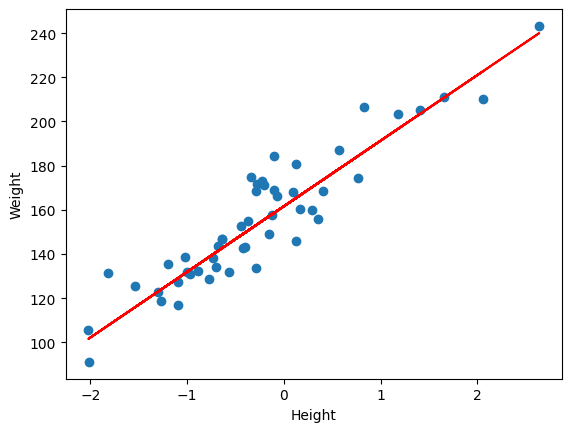

In [14]:
#Ploting best fit line w.r.t training data
plt.scatter(X_train[:50],Y_train[:50])
plt.plot(X_train[:50],regression.predict(X_train[:50]),color = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')

##Predicting Test Data
1. Predicted weight output = intercept + coeff_(Height_value)
2. y_pred = -350.90089213009117 + 7.71816224(X_test)

In [15]:
#Predicting test data
Y_pred = regression.predict(X_test)
print(Y_pred)

[111.25140481 184.28645537 221.27328221 ... 212.97481052 178.37873927
 120.27246081]


In [16]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
RMSE = root_mean_squared_error(Y_test,Y_pred)
R_Squared = r2_score(Y_test,Y_pred)
print(MSE)
print(MAE)
print(RMSE)
print(R_Squared)


148.0883459912898
9.718150583712177
12.169155516768194
0.8557551335217736


In [17]:
#Ordinary Least Square(OLS) Linear Regression Model
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[-50.35991782  22.67513274  59.66195958 ...  51.3634879   16.76741665
 -41.33886182]


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.9
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                    7.98e-56
Time:                        19:58:42   Log-Likelihood:                         -48802.
No. Observations:                7500   AIC:                                  9.761e+04
Df Residuals:                    7499   BIC:                                  9.761e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.7058      1.872     15.872      0.000      26.037      33.375
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.167
Skew:                           0.030   Prob(JB):                        0.558
Kurtosis:                       3.005   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
regression.predict(scaler.transform([[71.88]]))

d:\Programming\Study\Machine Learning\Machine_Learning_ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([204.02326891])

In [22]:
no = int(input("Enter the number of people you want to predict the weight for: "))
for i in range(no):
    height = float(input("Enter the height of the person: "))
    weight = regression.predict(scaler.transform([[height]]))
    print(f"The weight of the person with height {height} inch is {weight[0]} pounds")

The weight of the person with height 75.0 inch is 228.13290474510666 pounds


d:\Programming\Study\Machine Learning\Machine_Learning_ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
